In [164]:
import random
from random import choice
from numpy.random import randint
import numpy as np

In [98]:
def creating_Population_of_bitStrings(size, n_bits):
  Population = []
  for i in range(0, size):
    Bitstring = ''.join(choice('01') for _ in range(n_bits))
    Population.append(Bitstring)
  return Population

# Source: https://stackoverflow.com/questions/22609509/python-generate-a-string-of-bits

In [126]:
def Mutation(Child, mutation_rate):
  Mutated = ''
  for x in range(0, len(Child)):  # go trough index of bit string
    if round(random.random(),2) < mutation_rate: # if random float number is less than mutation rate, meaning mutation happends,  and index has value 1
      if Child[x] == '1':        
        Mutated += '0'                   #Value is changed to 0
      else:                                                  
        Mutated += '1'
    else:
      Mutated+=Child[x]
  return Mutated

In [187]:
def fitness(Population):
  val = []
  scores = []
  for x in range(0, len(Population)):
    score = 0
    for i in range(0, len(Population[x])):
      if(Population[x][i] == '1'):
        score+=1
    val.append([x, score])
    scores.append(score)
  return sorted(val, reverse = True, key = lambda x: x[1]), scores

In [144]:
# Tournament selection
def selection(Population, fittest, K=3):
  # Get a random position from the population
  position = randint(len(Population))
  # For two individuals
  for x in randint(0, len(Population), K-1):
    # If score of random position is lower than the chosen position 
    if fittest[position][1] < fittest[x][1]:
      # Update the position
      position = x
      # Return the best bit string
  return Population[fittest[position][0]]
  
  # https://www.geeksforgeeks.org/tournament-selection-ga/
  # https://machinelearningmastery.com/simple-genetic-algorithm-from-scratch-in-python/

In [145]:
def crossover(Parent1, Parent2, crossover_rate):
  child1 = Parent1
  child2 = Parent2
  if round(random.random(),2) < crossover_rate:
    point = random.randint(1, len(Parent1)-1)
    child1 = Parent1[:point] + Parent2[point:]
    child2 = Parent2[:point] + Parent1[point:]
  return [child1, child2]
  
  # https://machinelearningmastery.com/simple-genetic-algorithm-from-scratch-in-python/

In [188]:
def GA(population_size, bit_size, mutation_rate, cross_rate):
    # Init variables and population
    number_of_generations = 0
    Population = creating_Population_of_bitStrings(population_size, bit_size)
    Top_bitstring = 0
    Best_score = 0
    scores = []
    Top_scores = []
    score_average = []
    deviation = []
    # Go through generations
    print(f'Initialize generations....')
    while(Best_score != bit_size):
      best, scores = fitness(Population)
      score_average.append(np.average(scores))
      deviation.append(np.std(scores))
      Top_scores.append(best[0][1])
      # Find best score
      if Best_score < best[0][1]:
        Top_bitstring = Population[best[0][0]]
        Best_score = best[0][1]
      # Selection of best parents
      sel = [selection(Population, best) for x in range(0, population_size)]
      Children = []
      # For half the population size
      for x in range(0, population_size, 2):
        # Create children using selected parents
        for c in crossover(sel[x], sel[x+1], cross_rate):
          # Apply mutation to children created
          mutated = Mutation(c, mutation_rate)
          Children.append(mutated)
      # New generation created    
      Population = Children
      best = fitness(Population)
      number_of_generations+=1
      print(f'Current top bitstring for generation {number_of_generations}: {Top_bitstring}')
      print(f'Top score for generation {number_of_generations}: {Best_score}')
    return Top_scores,score_average,deviation, number_of_generations 

# https://machinelearningmastery.com/simple-genetic-algorithm-from-scratch-in-python/

In [214]:
import matplotlib.pyplot as plt
def plotting(x, top, av, dev, tittle):
  plt.title(tittle)

  plt.xlabel("Generations until convergence")
  plt.ylabel("Fitness score")

  plt.plot(x, top, label= "Top score")
  plt.plot(x, av, label= "Average score")
  plt.plot(x, dev, label= "Deviation score")
  plt.legend()
  plt.show

In [157]:
# Test functions
pop = creating_Population_of_bitStrings(100, 100)
print("Checking bit string")
print(pop[0])
print("\nChecking fitness")
fit = fitness(pop)
# ID of bitstring, fitness score
print(fit[0])
print(pop[fit[0][0]])
print("\nTesting selected")
selected = selection(pop, fit)
selected1 = selection(pop, fit)
print("Parent 1: " + selected)
print("Parent 2: " + selected1)
print("\nCrossover Test")
children = crossover(selected, selected1, 0.40)
print(children)
# Test mutation
print("\nChecking mutation")
mut = Mutation(children[0], 0.1)
for x in range(0, len(children[0])):
  if mut[x] != children[0][x]:
    print("Mutation happend")
    break;
print(f'Old bitstring: {children[0]}')
print(f'New bitstring: {mut}')

Checking bit string
1001011111111001100010110101101100110000101000011010000011110010111000100111101001111011100110000110

Checking fitness
[2, 62]
0001110111011001011101111011101000000110111111011101100111101111111010001101111001101100100011110101

Testing selected
Parent 1: 0011110110111111111001011111100111111000101011100100010111100101111000010001111101111110110010010001
Parent 2: 1110101111011001101001001010000110011110010001110101111100111010000101100001101010111111101010010110

Crossover Test
['0011110110111111111001011111100111111000010001110101111100111010000101100001101010111111101010010110', '1110101111011001101001001010000110011110101011100100010111100101111000010001111101111110110010010001']

Checking mutation
Mutation happend
Old bitstring: 0011110110111111111001011111100111111000010001110101111100111010000101100001101010111111101010010110
New bitstring: 0001110100111111010001011111100111001001010001110101111100111010000101100011111010111111100110010100


In [226]:
# Need to test 10, 100 and 1000 bit string length

# Check different mutation rate and cross rate

# 30 runs

bit_length = 100
pop_size = 100
mutation_rate = 0.01
cross_rate = 0.45

top = []
av = []
dev = []
gens = 0

top, av, dev, gens = GA(pop_size, bit_length, mutation_rate, cross_rate)
x = np.arange(0,gens)

Initialize generations....
Current top bitstring for generation 1: 1110111011110111111011010110101111011010010110001111111110110010101100100011111101111010000110011001
Top score for generation 1: 64
Current top bitstring for generation 2: 1110111011110111111011010110101111011010010110001111111110110010101100100011111101111010000110011001
Top score for generation 2: 64
Current top bitstring for generation 3: 1110111011110111111011010110101111011010010110001111111110110010101100101011111101111010000110011001
Top score for generation 3: 65
Current top bitstring for generation 4: 1110111111011101111100101111001011110101011011111110111100110000110110110100111100110110111000010111
Top score for generation 4: 66
Current top bitstring for generation 5: 1110111111011101111100101111001011110101011011111110111101101110111001111101110110101101111010111110
Top score for generation 5: 73
Current top bitstring for generation 6: 1110111111011101111100101111001011110101011011111110111101101110111001111

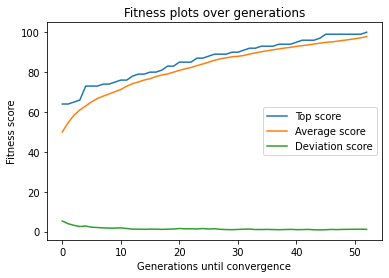

In [227]:
plotting(x,top,av,dev, "Fitness plots over generations")